### Standards for plots for jGCaMP8 paper

Plot the sensors in the following order: 

 1. jGCaMP8f
 2. jGCaMP8m
 3. jGCaMP8s
 4. GCaMP6s (if applicable)
 5. jGCaMP7f (if applicable)
 6. jGCaMP7s (if applicable)
 7. XCaMP-Gf (if applicable)

In [110]:
'''
make mock dataset
'''
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

tips = sns.load_dataset("tips")
hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'GCaMP6s', 'jGCaMP7f', 'jGCaMP7s', 'XCaMP-Gf']
hits_colors = ['#0000ff',  '#ff0000', '#666666',  '#FFD670', '#00ff00',  '#E5A4CB',  '#0099ff']

np.random.seed(42)

data = pd.DataFrame()

# populate mock dataframe with random values + a few outliers
addition = 0
for hit in hits_label:
    data[hit] = np.concatenate([np.random.random(50), np.random.uniform(low=0, high=3,size=5)]) + addition
    addition+=.3

data = pd.melt(data, var_name='construct')

data.head()

,construct,value
0,jGCaMP8f,0.374540
1,jGCaMP8f,0.950714
2,jGCaMP8f,0.731994
3,jGCaMP8f,0.598658
4,jGCaMP8f,0.156019


### box plots with fewer than ~50 points

Combination of stripplot and boxplot, showing all points

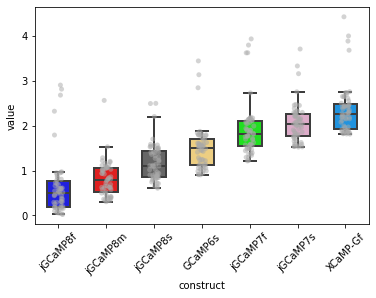

In [111]:

ax = sns.stripplot(x="construct",
                   y='value', 
                   data=data, 
                   order = hits_label, 
                   size=5,
                   alpha=0.5,
                  #zorder=1,
                  color='darkgray')
sns.boxplot(ax=ax,x="construct", 
                 y='value', 
                 data=data, 
                 order = hits_label, 
                 showfliers=False, 
                 linewidth=2,
                 width=.5,
                 #zorder=100,
                 palette = hits_colors,
                )

ax.set_xticklabels(hits_label,rotation=45)

pass

### box plots with >50 points

Boxplot with outlier markers

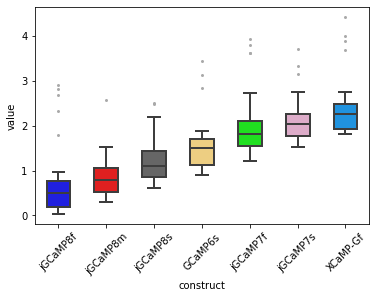

In [112]:

ax2 = sns.boxplot(x="construct", 
                 y='value', 
                 data=data, 
                 order = hits_label, 
                 showfliers=True,
                 fliersize=3,
                 linewidth=2,
                 width=.5,
                 #zorder=100,
                 palette = hits_colors,
                 flierprops = {'marker': 'o',
                               'markeredgecolor':'none',
                               'markerfacecolor':'darkgray'}
                )

ax2.set_xticklabels(hits_label,rotation=45)
pass